In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine

# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
import seaborn as sns
airbnb=pd.read_csv("listings_athens.csv")
airbnb.columns
airbnb.drop([ 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified','bathrooms',
       'bathrooms_text', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes','neighbourhood_group_cleansed',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month','accommodates','neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude' ], axis=1, inplace=True)





# re-ordering the columns

# this is the final dataframe to calculate the peak season and off season



In [3]:
airbnb.price =airbnb.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
airbnb.price.isna().sum()

<ipython-input-3-c020161d56e3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


0

In [4]:
airbnb


,id,property_type,room_type,amenities,price
0,10595,Entire rental unit,Entire home/apt,"[""Kitchen"", ""Free street parking"", ""Crib"", ""Pa...",79
1,10990,Entire rental unit,Entire home/apt,"[""Kitchen"", ""Luggage dropoff allowed"", ""Free s...",50
2,10993,Entire rental unit,Entire home/apt,"[""Kitchen"", ""Free street parking"", ""Patio or b...",38
3,10995,Entire rental unit,Entire home/apt,"[""Kitchen"", ""Free street parking"", ""Patio or b...",48
4,27262,Entire rental unit,Entire home/apt,"[""Kitchen"", ""Free street parking"", ""Crib"", ""Pa...",47
...,...,...,...,...,...
9577,52959003,Entire rental unit,Entire home/apt,"[""Kitchen"", ""Hair dryer"", ""Wifi"", ""Pack \u2019...",10
9578,52959885,Private room in rental unit,Private room,"[""Indoor fireplace"", ""Long term stays allowed""...",31
9579,52959925,Entire rental unit,Entire home/apt,"[""Kitchen"", ""Body soap"", ""Free street parking""...",65
9580,52960132,Entire rental unit,Entire home/apt,"[""Kitchen"", ""Body soap"", ""Free street parking""...",79


In [5]:
airbnb["amenities"].value_counts()

["Free street parking", "Crib", "Patio or balcony", "TV", "Private entrance", "Host greets you", "Outdoor furniture", "Free parking on premises", "Wifi", "Long term stays allowed", "Iron", "Backyard", "Air conditioning", "Lock on bedroom door", "Elevator", "Hangers", "Essentials", "Heating", "Fire extinguisher", "Hair dryer", "Dedicated workspace", "Shampoo"]                                                                                                                                                                                                                                                                                                                                                                                                13
["Luggage dropoff allowed", "Cable TV", "Body soap", "TV with standard cable", "Crib", "Room-darkening shades", "Safe", "Private entrance", "First aid kit", "Mini fridge", "Wine glasses", "Wifi", "Cleaning before checkout", "Clothing storage", "Pack \u

In [6]:
airbnb["amenities"] = airbnb["amenities"].apply(eval)

In [7]:
for i, l in enumerate(airbnb["amenities"]):
    print("list",i,"is",type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>
list 11 is <class 'list'>
list 12 is <class 'list'>
list 13 is <class 'list'>
list 14 is <class 'list'>
list 15 is <class 'list'>
list 16 is <class 'list'>
list 17 is <class 'list'>
list 18 is <class 'list'>
list 19 is <class 'list'>
list 20 is <class 'list'>
list 21 is <class 'list'>
list 22 is <class 'list'>
list 23 is <class 'list'>
list 24 is <class 'list'>
list 25 is <class 'list'>
list 26 is <class 'list'>
list 27 is <class 'list'>
list 28 is <class 'list'>
list 29 is <class 'list'>
list 30 is <class 'list'>
list 31 is <class 'list'>
list 32 is <class 'list'>
list 33 is <class 'list'>
list 34 is <class 'list'>
list 35 is <class 'list'>
list 36 is <class 'list'>
list 37 is <class 'list'>
list 38 is <class 'lis

list 430 is <class 'list'>
list 431 is <class 'list'>
list 432 is <class 'list'>
list 433 is <class 'list'>
list 434 is <class 'list'>
list 435 is <class 'list'>
list 436 is <class 'list'>
list 437 is <class 'list'>
list 438 is <class 'list'>
list 439 is <class 'list'>
list 440 is <class 'list'>
list 441 is <class 'list'>
list 442 is <class 'list'>
list 443 is <class 'list'>
list 444 is <class 'list'>
list 445 is <class 'list'>
list 446 is <class 'list'>
list 447 is <class 'list'>
list 448 is <class 'list'>
list 449 is <class 'list'>
list 450 is <class 'list'>
list 451 is <class 'list'>
list 452 is <class 'list'>
list 453 is <class 'list'>
list 454 is <class 'list'>
list 455 is <class 'list'>
list 456 is <class 'list'>
list 457 is <class 'list'>
list 458 is <class 'list'>
list 459 is <class 'list'>
list 460 is <class 'list'>
list 461 is <class 'list'>
list 462 is <class 'list'>
list 463 is <class 'list'>
list 464 is <class 'list'>
list 465 is <class 'list'>
list 466 is <class 'list'>
l

list 819 is <class 'list'>
list 820 is <class 'list'>
list 821 is <class 'list'>
list 822 is <class 'list'>
list 823 is <class 'list'>
list 824 is <class 'list'>
list 825 is <class 'list'>
list 826 is <class 'list'>
list 827 is <class 'list'>
list 828 is <class 'list'>
list 829 is <class 'list'>
list 830 is <class 'list'>
list 831 is <class 'list'>
list 832 is <class 'list'>
list 833 is <class 'list'>
list 834 is <class 'list'>
list 835 is <class 'list'>
list 836 is <class 'list'>
list 837 is <class 'list'>
list 838 is <class 'list'>
list 839 is <class 'list'>
list 840 is <class 'list'>
list 841 is <class 'list'>
list 842 is <class 'list'>
list 843 is <class 'list'>
list 844 is <class 'list'>
list 845 is <class 'list'>
list 846 is <class 'list'>
list 847 is <class 'list'>
list 848 is <class 'list'>
list 849 is <class 'list'>
list 850 is <class 'list'>
list 851 is <class 'list'>
list 852 is <class 'list'>
list 853 is <class 'list'>
list 854 is <class 'list'>
list 855 is <class 'list'>
l

list 1199 is <class 'list'>
list 1200 is <class 'list'>
list 1201 is <class 'list'>
list 1202 is <class 'list'>
list 1203 is <class 'list'>
list 1204 is <class 'list'>
list 1205 is <class 'list'>
list 1206 is <class 'list'>
list 1207 is <class 'list'>
list 1208 is <class 'list'>
list 1209 is <class 'list'>
list 1210 is <class 'list'>
list 1211 is <class 'list'>
list 1212 is <class 'list'>
list 1213 is <class 'list'>
list 1214 is <class 'list'>
list 1215 is <class 'list'>
list 1216 is <class 'list'>
list 1217 is <class 'list'>
list 1218 is <class 'list'>
list 1219 is <class 'list'>
list 1220 is <class 'list'>
list 1221 is <class 'list'>
list 1222 is <class 'list'>
list 1223 is <class 'list'>
list 1224 is <class 'list'>
list 1225 is <class 'list'>
list 1226 is <class 'list'>
list 1227 is <class 'list'>
list 1228 is <class 'list'>
list 1229 is <class 'list'>
list 1230 is <class 'list'>
list 1231 is <class 'list'>
list 1232 is <class 'list'>
list 1233 is <class 'list'>
list 1234 is <class 

list 1596 is <class 'list'>
list 1597 is <class 'list'>
list 1598 is <class 'list'>
list 1599 is <class 'list'>
list 1600 is <class 'list'>
list 1601 is <class 'list'>
list 1602 is <class 'list'>
list 1603 is <class 'list'>
list 1604 is <class 'list'>
list 1605 is <class 'list'>
list 1606 is <class 'list'>
list 1607 is <class 'list'>
list 1608 is <class 'list'>
list 1609 is <class 'list'>
list 1610 is <class 'list'>
list 1611 is <class 'list'>
list 1612 is <class 'list'>
list 1613 is <class 'list'>
list 1614 is <class 'list'>
list 1615 is <class 'list'>
list 1616 is <class 'list'>
list 1617 is <class 'list'>
list 1618 is <class 'list'>
list 1619 is <class 'list'>
list 1620 is <class 'list'>
list 1621 is <class 'list'>
list 1622 is <class 'list'>
list 1623 is <class 'list'>
list 1624 is <class 'list'>
list 1625 is <class 'list'>
list 1626 is <class 'list'>
list 1627 is <class 'list'>
list 1628 is <class 'list'>
list 1629 is <class 'list'>
list 1630 is <class 'list'>
list 1631 is <class 

list 1986 is <class 'list'>
list 1987 is <class 'list'>
list 1988 is <class 'list'>
list 1989 is <class 'list'>
list 1990 is <class 'list'>
list 1991 is <class 'list'>
list 1992 is <class 'list'>
list 1993 is <class 'list'>
list 1994 is <class 'list'>
list 1995 is <class 'list'>
list 1996 is <class 'list'>
list 1997 is <class 'list'>
list 1998 is <class 'list'>
list 1999 is <class 'list'>
list 2000 is <class 'list'>
list 2001 is <class 'list'>
list 2002 is <class 'list'>
list 2003 is <class 'list'>
list 2004 is <class 'list'>
list 2005 is <class 'list'>
list 2006 is <class 'list'>
list 2007 is <class 'list'>
list 2008 is <class 'list'>
list 2009 is <class 'list'>
list 2010 is <class 'list'>
list 2011 is <class 'list'>
list 2012 is <class 'list'>
list 2013 is <class 'list'>
list 2014 is <class 'list'>
list 2015 is <class 'list'>
list 2016 is <class 'list'>
list 2017 is <class 'list'>
list 2018 is <class 'list'>
list 2019 is <class 'list'>
list 2020 is <class 'list'>
list 2021 is <class 

list 2381 is <class 'list'>
list 2382 is <class 'list'>
list 2383 is <class 'list'>
list 2384 is <class 'list'>
list 2385 is <class 'list'>
list 2386 is <class 'list'>
list 2387 is <class 'list'>
list 2388 is <class 'list'>
list 2389 is <class 'list'>
list 2390 is <class 'list'>
list 2391 is <class 'list'>
list 2392 is <class 'list'>
list 2393 is <class 'list'>
list 2394 is <class 'list'>
list 2395 is <class 'list'>
list 2396 is <class 'list'>
list 2397 is <class 'list'>
list 2398 is <class 'list'>
list 2399 is <class 'list'>
list 2400 is <class 'list'>
list 2401 is <class 'list'>
list 2402 is <class 'list'>
list 2403 is <class 'list'>
list 2404 is <class 'list'>
list 2405 is <class 'list'>
list 2406 is <class 'list'>
list 2407 is <class 'list'>
list 2408 is <class 'list'>
list 2409 is <class 'list'>
list 2410 is <class 'list'>
list 2411 is <class 'list'>
list 2412 is <class 'list'>
list 2413 is <class 'list'>
list 2414 is <class 'list'>
list 2415 is <class 'list'>
list 2416 is <class 

list 2773 is <class 'list'>
list 2774 is <class 'list'>
list 2775 is <class 'list'>
list 2776 is <class 'list'>
list 2777 is <class 'list'>
list 2778 is <class 'list'>
list 2779 is <class 'list'>
list 2780 is <class 'list'>
list 2781 is <class 'list'>
list 2782 is <class 'list'>
list 2783 is <class 'list'>
list 2784 is <class 'list'>
list 2785 is <class 'list'>
list 2786 is <class 'list'>
list 2787 is <class 'list'>
list 2788 is <class 'list'>
list 2789 is <class 'list'>
list 2790 is <class 'list'>
list 2791 is <class 'list'>
list 2792 is <class 'list'>
list 2793 is <class 'list'>
list 2794 is <class 'list'>
list 2795 is <class 'list'>
list 2796 is <class 'list'>
list 2797 is <class 'list'>
list 2798 is <class 'list'>
list 2799 is <class 'list'>
list 2800 is <class 'list'>
list 2801 is <class 'list'>
list 2802 is <class 'list'>
list 2803 is <class 'list'>
list 2804 is <class 'list'>
list 2805 is <class 'list'>
list 2806 is <class 'list'>
list 2807 is <class 'list'>
list 2808 is <class 

list 3166 is <class 'list'>
list 3167 is <class 'list'>
list 3168 is <class 'list'>
list 3169 is <class 'list'>
list 3170 is <class 'list'>
list 3171 is <class 'list'>
list 3172 is <class 'list'>
list 3173 is <class 'list'>
list 3174 is <class 'list'>
list 3175 is <class 'list'>
list 3176 is <class 'list'>
list 3177 is <class 'list'>
list 3178 is <class 'list'>
list 3179 is <class 'list'>
list 3180 is <class 'list'>
list 3181 is <class 'list'>
list 3182 is <class 'list'>
list 3183 is <class 'list'>
list 3184 is <class 'list'>
list 3185 is <class 'list'>
list 3186 is <class 'list'>
list 3187 is <class 'list'>
list 3188 is <class 'list'>
list 3189 is <class 'list'>
list 3190 is <class 'list'>
list 3191 is <class 'list'>
list 3192 is <class 'list'>
list 3193 is <class 'list'>
list 3194 is <class 'list'>
list 3195 is <class 'list'>
list 3196 is <class 'list'>
list 3197 is <class 'list'>
list 3198 is <class 'list'>
list 3199 is <class 'list'>
list 3200 is <class 'list'>
list 3201 is <class 

list 3571 is <class 'list'>
list 3572 is <class 'list'>
list 3573 is <class 'list'>
list 3574 is <class 'list'>
list 3575 is <class 'list'>
list 3576 is <class 'list'>
list 3577 is <class 'list'>
list 3578 is <class 'list'>
list 3579 is <class 'list'>
list 3580 is <class 'list'>
list 3581 is <class 'list'>
list 3582 is <class 'list'>
list 3583 is <class 'list'>
list 3584 is <class 'list'>
list 3585 is <class 'list'>
list 3586 is <class 'list'>
list 3587 is <class 'list'>
list 3588 is <class 'list'>
list 3589 is <class 'list'>
list 3590 is <class 'list'>
list 3591 is <class 'list'>
list 3592 is <class 'list'>
list 3593 is <class 'list'>
list 3594 is <class 'list'>
list 3595 is <class 'list'>
list 3596 is <class 'list'>
list 3597 is <class 'list'>
list 3598 is <class 'list'>
list 3599 is <class 'list'>
list 3600 is <class 'list'>
list 3601 is <class 'list'>
list 3602 is <class 'list'>
list 3603 is <class 'list'>
list 3604 is <class 'list'>
list 3605 is <class 'list'>
list 3606 is <class 

list 3973 is <class 'list'>
list 3974 is <class 'list'>
list 3975 is <class 'list'>
list 3976 is <class 'list'>
list 3977 is <class 'list'>
list 3978 is <class 'list'>
list 3979 is <class 'list'>
list 3980 is <class 'list'>
list 3981 is <class 'list'>
list 3982 is <class 'list'>
list 3983 is <class 'list'>
list 3984 is <class 'list'>
list 3985 is <class 'list'>
list 3986 is <class 'list'>
list 3987 is <class 'list'>
list 3988 is <class 'list'>
list 3989 is <class 'list'>
list 3990 is <class 'list'>
list 3991 is <class 'list'>
list 3992 is <class 'list'>
list 3993 is <class 'list'>
list 3994 is <class 'list'>
list 3995 is <class 'list'>
list 3996 is <class 'list'>
list 3997 is <class 'list'>
list 3998 is <class 'list'>
list 3999 is <class 'list'>
list 4000 is <class 'list'>
list 4001 is <class 'list'>
list 4002 is <class 'list'>
list 4003 is <class 'list'>
list 4004 is <class 'list'>
list 4005 is <class 'list'>
list 4006 is <class 'list'>
list 4007 is <class 'list'>
list 4008 is <class 

list 4363 is <class 'list'>
list 4364 is <class 'list'>
list 4365 is <class 'list'>
list 4366 is <class 'list'>
list 4367 is <class 'list'>
list 4368 is <class 'list'>
list 4369 is <class 'list'>
list 4370 is <class 'list'>
list 4371 is <class 'list'>
list 4372 is <class 'list'>
list 4373 is <class 'list'>
list 4374 is <class 'list'>
list 4375 is <class 'list'>
list 4376 is <class 'list'>
list 4377 is <class 'list'>
list 4378 is <class 'list'>
list 4379 is <class 'list'>
list 4380 is <class 'list'>
list 4381 is <class 'list'>
list 4382 is <class 'list'>
list 4383 is <class 'list'>
list 4384 is <class 'list'>
list 4385 is <class 'list'>
list 4386 is <class 'list'>
list 4387 is <class 'list'>
list 4388 is <class 'list'>
list 4389 is <class 'list'>
list 4390 is <class 'list'>
list 4391 is <class 'list'>
list 4392 is <class 'list'>
list 4393 is <class 'list'>
list 4394 is <class 'list'>
list 4395 is <class 'list'>
list 4396 is <class 'list'>
list 4397 is <class 'list'>
list 4398 is <class 

list 4758 is <class 'list'>
list 4759 is <class 'list'>
list 4760 is <class 'list'>
list 4761 is <class 'list'>
list 4762 is <class 'list'>
list 4763 is <class 'list'>
list 4764 is <class 'list'>
list 4765 is <class 'list'>
list 4766 is <class 'list'>
list 4767 is <class 'list'>
list 4768 is <class 'list'>
list 4769 is <class 'list'>
list 4770 is <class 'list'>
list 4771 is <class 'list'>
list 4772 is <class 'list'>
list 4773 is <class 'list'>
list 4774 is <class 'list'>
list 4775 is <class 'list'>
list 4776 is <class 'list'>
list 4777 is <class 'list'>
list 4778 is <class 'list'>
list 4779 is <class 'list'>
list 4780 is <class 'list'>
list 4781 is <class 'list'>
list 4782 is <class 'list'>
list 4783 is <class 'list'>
list 4784 is <class 'list'>
list 4785 is <class 'list'>
list 4786 is <class 'list'>
list 4787 is <class 'list'>
list 4788 is <class 'list'>
list 4789 is <class 'list'>
list 4790 is <class 'list'>
list 4791 is <class 'list'>
list 4792 is <class 'list'>
list 4793 is <class 

list 5158 is <class 'list'>
list 5159 is <class 'list'>
list 5160 is <class 'list'>
list 5161 is <class 'list'>
list 5162 is <class 'list'>
list 5163 is <class 'list'>
list 5164 is <class 'list'>
list 5165 is <class 'list'>
list 5166 is <class 'list'>
list 5167 is <class 'list'>
list 5168 is <class 'list'>
list 5169 is <class 'list'>
list 5170 is <class 'list'>
list 5171 is <class 'list'>
list 5172 is <class 'list'>
list 5173 is <class 'list'>
list 5174 is <class 'list'>
list 5175 is <class 'list'>
list 5176 is <class 'list'>
list 5177 is <class 'list'>
list 5178 is <class 'list'>
list 5179 is <class 'list'>
list 5180 is <class 'list'>
list 5181 is <class 'list'>
list 5182 is <class 'list'>
list 5183 is <class 'list'>
list 5184 is <class 'list'>
list 5185 is <class 'list'>
list 5186 is <class 'list'>
list 5187 is <class 'list'>
list 5188 is <class 'list'>
list 5189 is <class 'list'>
list 5190 is <class 'list'>
list 5191 is <class 'list'>
list 5192 is <class 'list'>
list 5193 is <class 

list 5562 is <class 'list'>
list 5563 is <class 'list'>
list 5564 is <class 'list'>
list 5565 is <class 'list'>
list 5566 is <class 'list'>
list 5567 is <class 'list'>
list 5568 is <class 'list'>
list 5569 is <class 'list'>
list 5570 is <class 'list'>
list 5571 is <class 'list'>
list 5572 is <class 'list'>
list 5573 is <class 'list'>
list 5574 is <class 'list'>
list 5575 is <class 'list'>
list 5576 is <class 'list'>
list 5577 is <class 'list'>
list 5578 is <class 'list'>
list 5579 is <class 'list'>
list 5580 is <class 'list'>
list 5581 is <class 'list'>
list 5582 is <class 'list'>
list 5583 is <class 'list'>
list 5584 is <class 'list'>
list 5585 is <class 'list'>
list 5586 is <class 'list'>
list 5587 is <class 'list'>
list 5588 is <class 'list'>
list 5589 is <class 'list'>
list 5590 is <class 'list'>
list 5591 is <class 'list'>
list 5592 is <class 'list'>
list 5593 is <class 'list'>
list 5594 is <class 'list'>
list 5595 is <class 'list'>
list 5596 is <class 'list'>
list 5597 is <class 

list 5973 is <class 'list'>
list 5974 is <class 'list'>
list 5975 is <class 'list'>
list 5976 is <class 'list'>
list 5977 is <class 'list'>
list 5978 is <class 'list'>
list 5979 is <class 'list'>
list 5980 is <class 'list'>
list 5981 is <class 'list'>
list 5982 is <class 'list'>
list 5983 is <class 'list'>
list 5984 is <class 'list'>
list 5985 is <class 'list'>
list 5986 is <class 'list'>
list 5987 is <class 'list'>
list 5988 is <class 'list'>
list 5989 is <class 'list'>
list 5990 is <class 'list'>
list 5991 is <class 'list'>
list 5992 is <class 'list'>
list 5993 is <class 'list'>
list 5994 is <class 'list'>
list 5995 is <class 'list'>
list 5996 is <class 'list'>
list 5997 is <class 'list'>
list 5998 is <class 'list'>
list 5999 is <class 'list'>
list 6000 is <class 'list'>
list 6001 is <class 'list'>
list 6002 is <class 'list'>
list 6003 is <class 'list'>
list 6004 is <class 'list'>
list 6005 is <class 'list'>
list 6006 is <class 'list'>
list 6007 is <class 'list'>
list 6008 is <class 

list 6275 is <class 'list'>
list 6276 is <class 'list'>
list 6277 is <class 'list'>
list 6278 is <class 'list'>
list 6279 is <class 'list'>
list 6280 is <class 'list'>
list 6281 is <class 'list'>
list 6282 is <class 'list'>
list 6283 is <class 'list'>
list 6284 is <class 'list'>
list 6285 is <class 'list'>
list 6286 is <class 'list'>
list 6287 is <class 'list'>
list 6288 is <class 'list'>
list 6289 is <class 'list'>
list 6290 is <class 'list'>
list 6291 is <class 'list'>
list 6292 is <class 'list'>
list 6293 is <class 'list'>
list 6294 is <class 'list'>
list 6295 is <class 'list'>
list 6296 is <class 'list'>
list 6297 is <class 'list'>
list 6298 is <class 'list'>
list 6299 is <class 'list'>
list 6300 is <class 'list'>
list 6301 is <class 'list'>
list 6302 is <class 'list'>
list 6303 is <class 'list'>
list 6304 is <class 'list'>
list 6305 is <class 'list'>
list 6306 is <class 'list'>
list 6307 is <class 'list'>
list 6308 is <class 'list'>
list 6309 is <class 'list'>
list 6310 is <class 

list 6653 is <class 'list'>
list 6654 is <class 'list'>
list 6655 is <class 'list'>
list 6656 is <class 'list'>
list 6657 is <class 'list'>
list 6658 is <class 'list'>
list 6659 is <class 'list'>
list 6660 is <class 'list'>
list 6661 is <class 'list'>
list 6662 is <class 'list'>
list 6663 is <class 'list'>
list 6664 is <class 'list'>
list 6665 is <class 'list'>
list 6666 is <class 'list'>
list 6667 is <class 'list'>
list 6668 is <class 'list'>
list 6669 is <class 'list'>
list 6670 is <class 'list'>
list 6671 is <class 'list'>
list 6672 is <class 'list'>
list 6673 is <class 'list'>
list 6674 is <class 'list'>
list 6675 is <class 'list'>
list 6676 is <class 'list'>
list 6677 is <class 'list'>
list 6678 is <class 'list'>
list 6679 is <class 'list'>
list 6680 is <class 'list'>
list 6681 is <class 'list'>
list 6682 is <class 'list'>
list 6683 is <class 'list'>
list 6684 is <class 'list'>
list 6685 is <class 'list'>
list 6686 is <class 'list'>
list 6687 is <class 'list'>
list 6688 is <class 

list 7068 is <class 'list'>
list 7069 is <class 'list'>
list 7070 is <class 'list'>
list 7071 is <class 'list'>
list 7072 is <class 'list'>
list 7073 is <class 'list'>
list 7074 is <class 'list'>
list 7075 is <class 'list'>
list 7076 is <class 'list'>
list 7077 is <class 'list'>
list 7078 is <class 'list'>
list 7079 is <class 'list'>
list 7080 is <class 'list'>
list 7081 is <class 'list'>
list 7082 is <class 'list'>
list 7083 is <class 'list'>
list 7084 is <class 'list'>
list 7085 is <class 'list'>
list 7086 is <class 'list'>
list 7087 is <class 'list'>
list 7088 is <class 'list'>
list 7089 is <class 'list'>
list 7090 is <class 'list'>
list 7091 is <class 'list'>
list 7092 is <class 'list'>
list 7093 is <class 'list'>
list 7094 is <class 'list'>
list 7095 is <class 'list'>
list 7096 is <class 'list'>
list 7097 is <class 'list'>
list 7098 is <class 'list'>
list 7099 is <class 'list'>
list 7100 is <class 'list'>
list 7101 is <class 'list'>
list 7102 is <class 'list'>
list 7103 is <class 

list 7450 is <class 'list'>
list 7451 is <class 'list'>
list 7452 is <class 'list'>
list 7453 is <class 'list'>
list 7454 is <class 'list'>
list 7455 is <class 'list'>
list 7456 is <class 'list'>
list 7457 is <class 'list'>
list 7458 is <class 'list'>
list 7459 is <class 'list'>
list 7460 is <class 'list'>
list 7461 is <class 'list'>
list 7462 is <class 'list'>
list 7463 is <class 'list'>
list 7464 is <class 'list'>
list 7465 is <class 'list'>
list 7466 is <class 'list'>
list 7467 is <class 'list'>
list 7468 is <class 'list'>
list 7469 is <class 'list'>
list 7470 is <class 'list'>
list 7471 is <class 'list'>
list 7472 is <class 'list'>
list 7473 is <class 'list'>
list 7474 is <class 'list'>
list 7475 is <class 'list'>
list 7476 is <class 'list'>
list 7477 is <class 'list'>
list 7478 is <class 'list'>
list 7479 is <class 'list'>
list 7480 is <class 'list'>
list 7481 is <class 'list'>
list 7482 is <class 'list'>
list 7483 is <class 'list'>
list 7484 is <class 'list'>
list 7485 is <class 

list 7841 is <class 'list'>
list 7842 is <class 'list'>
list 7843 is <class 'list'>
list 7844 is <class 'list'>
list 7845 is <class 'list'>
list 7846 is <class 'list'>
list 7847 is <class 'list'>
list 7848 is <class 'list'>
list 7849 is <class 'list'>
list 7850 is <class 'list'>
list 7851 is <class 'list'>
list 7852 is <class 'list'>
list 7853 is <class 'list'>
list 7854 is <class 'list'>
list 7855 is <class 'list'>
list 7856 is <class 'list'>
list 7857 is <class 'list'>
list 7858 is <class 'list'>
list 7859 is <class 'list'>
list 7860 is <class 'list'>
list 7861 is <class 'list'>
list 7862 is <class 'list'>
list 7863 is <class 'list'>
list 7864 is <class 'list'>
list 7865 is <class 'list'>
list 7866 is <class 'list'>
list 7867 is <class 'list'>
list 7868 is <class 'list'>
list 7869 is <class 'list'>
list 7870 is <class 'list'>
list 7871 is <class 'list'>
list 7872 is <class 'list'>
list 7873 is <class 'list'>
list 7874 is <class 'list'>
list 7875 is <class 'list'>
list 7876 is <class 

list 8242 is <class 'list'>
list 8243 is <class 'list'>
list 8244 is <class 'list'>
list 8245 is <class 'list'>
list 8246 is <class 'list'>
list 8247 is <class 'list'>
list 8248 is <class 'list'>
list 8249 is <class 'list'>
list 8250 is <class 'list'>
list 8251 is <class 'list'>
list 8252 is <class 'list'>
list 8253 is <class 'list'>
list 8254 is <class 'list'>
list 8255 is <class 'list'>
list 8256 is <class 'list'>
list 8257 is <class 'list'>
list 8258 is <class 'list'>
list 8259 is <class 'list'>
list 8260 is <class 'list'>
list 8261 is <class 'list'>
list 8262 is <class 'list'>
list 8263 is <class 'list'>
list 8264 is <class 'list'>
list 8265 is <class 'list'>
list 8266 is <class 'list'>
list 8267 is <class 'list'>
list 8268 is <class 'list'>
list 8269 is <class 'list'>
list 8270 is <class 'list'>
list 8271 is <class 'list'>
list 8272 is <class 'list'>
list 8273 is <class 'list'>
list 8274 is <class 'list'>
list 8275 is <class 'list'>
list 8276 is <class 'list'>
list 8277 is <class 

list 8645 is <class 'list'>
list 8646 is <class 'list'>
list 8647 is <class 'list'>
list 8648 is <class 'list'>
list 8649 is <class 'list'>
list 8650 is <class 'list'>
list 8651 is <class 'list'>
list 8652 is <class 'list'>
list 8653 is <class 'list'>
list 8654 is <class 'list'>
list 8655 is <class 'list'>
list 8656 is <class 'list'>
list 8657 is <class 'list'>
list 8658 is <class 'list'>
list 8659 is <class 'list'>
list 8660 is <class 'list'>
list 8661 is <class 'list'>
list 8662 is <class 'list'>
list 8663 is <class 'list'>
list 8664 is <class 'list'>
list 8665 is <class 'list'>
list 8666 is <class 'list'>
list 8667 is <class 'list'>
list 8668 is <class 'list'>
list 8669 is <class 'list'>
list 8670 is <class 'list'>
list 8671 is <class 'list'>
list 8672 is <class 'list'>
list 8673 is <class 'list'>
list 8674 is <class 'list'>
list 8675 is <class 'list'>
list 8676 is <class 'list'>
list 8677 is <class 'list'>
list 8678 is <class 'list'>
list 8679 is <class 'list'>
list 8680 is <class 

list 9035 is <class 'list'>
list 9036 is <class 'list'>
list 9037 is <class 'list'>
list 9038 is <class 'list'>
list 9039 is <class 'list'>
list 9040 is <class 'list'>
list 9041 is <class 'list'>
list 9042 is <class 'list'>
list 9043 is <class 'list'>
list 9044 is <class 'list'>
list 9045 is <class 'list'>
list 9046 is <class 'list'>
list 9047 is <class 'list'>
list 9048 is <class 'list'>
list 9049 is <class 'list'>
list 9050 is <class 'list'>
list 9051 is <class 'list'>
list 9052 is <class 'list'>
list 9053 is <class 'list'>
list 9054 is <class 'list'>
list 9055 is <class 'list'>
list 9056 is <class 'list'>
list 9057 is <class 'list'>
list 9058 is <class 'list'>
list 9059 is <class 'list'>
list 9060 is <class 'list'>
list 9061 is <class 'list'>
list 9062 is <class 'list'>
list 9063 is <class 'list'>
list 9064 is <class 'list'>
list 9065 is <class 'list'>
list 9066 is <class 'list'>
list 9067 is <class 'list'>
list 9068 is <class 'list'>
list 9069 is <class 'list'>
list 9070 is <class 

list 9411 is <class 'list'>
list 9412 is <class 'list'>
list 9413 is <class 'list'>
list 9414 is <class 'list'>
list 9415 is <class 'list'>
list 9416 is <class 'list'>
list 9417 is <class 'list'>
list 9418 is <class 'list'>
list 9419 is <class 'list'>
list 9420 is <class 'list'>
list 9421 is <class 'list'>
list 9422 is <class 'list'>
list 9423 is <class 'list'>
list 9424 is <class 'list'>
list 9425 is <class 'list'>
list 9426 is <class 'list'>
list 9427 is <class 'list'>
list 9428 is <class 'list'>
list 9429 is <class 'list'>
list 9430 is <class 'list'>
list 9431 is <class 'list'>
list 9432 is <class 'list'>
list 9433 is <class 'list'>
list 9434 is <class 'list'>
list 9435 is <class 'list'>
list 9436 is <class 'list'>
list 9437 is <class 'list'>
list 9438 is <class 'list'>
list 9439 is <class 'list'>
list 9440 is <class 'list'>
list 9441 is <class 'list'>
list 9442 is <class 'list'>
list 9443 is <class 'list'>
list 9444 is <class 'list'>
list 9445 is <class 'list'>
list 9446 is <class 

In [8]:
fruits_expanded_v1 = airbnb["amenities"].apply(pd.Series)

In [9]:
fruits_expanded_v1

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,Kitchen,Free street parking,Crib,Patio or balcony,Ethernet connection,Dishwasher,Host greets you,Dishes and silverware,Long term stays allowed,Iron,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kitchen,Luggage dropoff allowed,Free street parking,Patio or balcony,Ethernet connection,TV,Host greets you,Pack ’n play/Travel crib,Dishes and silverware,Iron,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kitchen,Free street parking,Patio or balcony,Ethernet connection,Host greets you,Washer – In unit,Central air conditioning,Dishes and silverware,Long term stays allowed,Iron,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kitchen,Free street parking,Patio or balcony,Ethernet connection,Host greets you,Washer – In unit,Pack ’n play/Travel crib,Dishes and silverware,Iron,Security cameras on property,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kitchen,Free street parking,Crib,Patio or balcony,Ethernet connection,Dishwasher,Host greets you,Dishes and silverware,Long term stays allowed,Iron,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,Kitchen,Hair dryer,Wifi,Pack ’n play/Travel crib,Dedicated workspace,Iron,Long term stays allowed,Dryer,Cooking basics,Breakfast,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9578,Indoor fireplace,Long term stays allowed,Security cameras on property,Outdoor dining area,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9579,Kitchen,Body soap,Free street parking,Freezer,Paid parking garage off premises,Private patio or balcony,Room-darkening shades,TV,Wifi,Dishes and silverware,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9580,Kitchen,Body soap,Free street parking,Freezer,Paid parking garage off premises,Private patio or balcony,TV,Wifi,Dishes and silverware,Long term stays allowed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
fruit_dict = {}
for i in airbnb["amenities"]:
    for j in i:
        if j not in fruit_dict:
            fruit_dict[j] = 1
        else:
            fruit_dict[j] += 1

In [11]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [14]:
to_1D(airbnb["amenities"]).value_counts().index

Index(['Essentials', 'Hair dryer', 'Wifi', 'Long term stays allowed',
       'Air conditioning', 'Hangers', 'Kitchen', 'Iron', 'Shampoo', 'Heating',
       ...
       'Sony sound system with Bluetooth and aux', 'UNITED refrigerator',
       'Molton Brown conditioner', '36" HDTV with Netflix, standard cable',
       'Private brand shampoo', 'Toshiba conditioner',
       'BOSCH stainless steel electric stove',
       'OLIVIA from ABEA, white soap, olive oil/orange body soap', 'esco oven',
       'HDTV with premium cable, Netflix, Amazon Prime Video'],
      dtype='object', length=957)

In [15]:
to_1D(airbnb["amenities"]).value_counts().head()

Essentials                 9078
Hair dryer                 8774
Wifi                       8756
Long term stays allowed    8696
Air conditioning           8670
dtype: int64

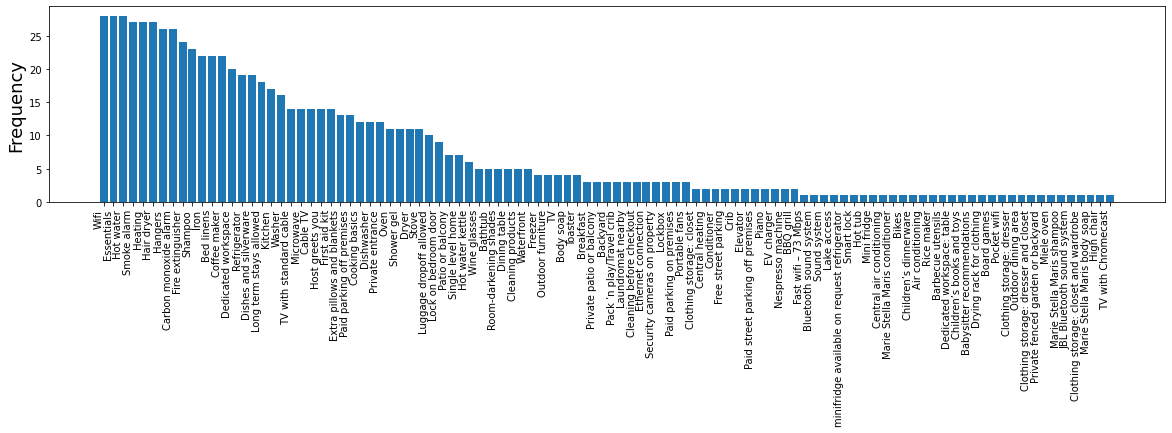

In [13]:
fig, ax = plt.subplots(figsize = (20,4))
ax.bar(to_1D(airbnb["amenities"].iloc[1:30]).value_counts().index,
        to_1D(airbnb["amenities"].iloc[1:30]).value_counts())
ax.set_ylabel("Frequency", size = 18)
fig.autofmt_xdate(rotation=90 ) 


In [54]:
newdata=to_1D(airbnb["amenities"])
len(newdata)

89021

In [55]:
newdata.drop_duplicates(keep='first',inplace=True)
len(newdata)

510

In [56]:
newdata.to_dict()
#newdata


{0: 'Shampoo',
 1: 'Microwave',
 2: 'Patio or balcony',
 3: 'Stove',
 4: 'Air conditioning',
 5: 'Hair dryer',
 6: 'TV with standard cable',
 7: 'Oven',
 8: 'Bed linens',
 9: 'Smoke alarm',
 10: 'Washer',
 11: 'Dedicated workspace',
 12: 'Dishwasher',
 13: 'Long term stays allowed',
 14: 'Iron',
 15: 'Free parking on premises',
 16: 'Kitchen',
 17: 'Carbon monoxide alarm',
 18: 'Refrigerator',
 19: 'Hangers',
 20: 'Essentials',
 21: 'Coffee maker',
 22: 'Wifi',
 23: 'Extra pillows and blankets',
 24: 'Cable TV',
 25: 'Dishes and silverware',
 26: 'Free street parking',
 27: 'Heating',
 28: 'Cooking basics',
 29: 'Dryer',
 30: 'Hot water',
 36: 'Private entrance',
 38: 'Bathtub',
 42: 'First aid kit',
 44: 'Fire extinguisher',
 46: 'Luggage dropoff allowed',
 59: 'Keypad',
 96: 'Elevator',
 111: 'Paid parking off premises',
 145: 'Ethernet connection',
 193: 'Lockbox',
 219: 'Electric stove',
 220: 'Freezer',
 237: 'Smart lock',
 249: 'Security cameras on property',
 253: 'Pack ’n play/

In [57]:
unique_values = dict((v,k) for k,v in newdata.items())
unique_values 

{'Shampoo': 0,
 'Microwave': 1,
 'Patio or balcony': 2,
 'Stove': 3,
 'Air conditioning': 4,
 'Hair dryer': 5,
 'TV with standard cable': 6,
 'Oven': 7,
 'Bed linens': 8,
 'Smoke alarm': 9,
 'Washer': 10,
 'Dedicated workspace': 11,
 'Dishwasher': 12,
 'Long term stays allowed': 13,
 'Iron': 14,
 'Free parking on premises': 15,
 'Kitchen': 16,
 'Carbon monoxide alarm': 17,
 'Refrigerator': 18,
 'Hangers': 19,
 'Essentials': 20,
 'Coffee maker': 21,
 'Wifi': 22,
 'Extra pillows and blankets': 23,
 'Cable TV': 24,
 'Dishes and silverware': 25,
 'Free street parking': 26,
 'Heating': 27,
 'Cooking basics': 28,
 'Dryer': 29,
 'Hot water': 30,
 'Private entrance': 36,
 'Bathtub': 38,
 'First aid kit': 42,
 'Fire extinguisher': 44,
 'Luggage dropoff allowed': 46,
 'Keypad': 59,
 'Elevator': 96,
 'Paid parking off premises': 111,
 'Ethernet connection': 145,
 'Lockbox': 193,
 'Electric stove': 219,
 'Freezer': 220,
 'Smart lock': 237,
 'Security cameras on property': 249,
 'Pack ’n play/Trave

In [58]:
airbnb["amenities"]

0       [Shampoo, Microwave, Patio or balcony, Stove, ...
1       [Shampoo, Microwave, Air conditioning, Hair dr...
2       [Shampoo, Microwave, Stove, Air conditioning, ...
3       [Microwave, Patio or balcony, Stove, Air condi...
4       [Microwave, Patio or balcony, Stove, Air condi...
                              ...                        
3244    [Indoor fireplace, Washer, TV, Dedicated works...
3245    [TV, Security cameras on property, Dedicated w...
3246    [Microwave, Stove, Air conditioning, Laundroma...
3247    [Microwave, Stove, Air conditioning, Laundroma...
3248    [Microwave, Stove, Air conditioning, Laundroma...
Name: amenities, Length: 3249, dtype: object

In [59]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [60]:
fruits_bool = boolean_df( airbnb["amenities"],
                         unique_values.keys())
fruits_bool

,Shampoo,Microwave,Patio or balcony,Stove,Air conditioning,Hair dryer,TV with standard cable,Oven,Bed linens,Smoke alarm,...,Organic shampoo,Organic body soap,Indoor pool,HDTV with Amazon Prime Video,HDTV with Netflix,"65"" HDTV with Chromecast, Netflix",GE Profile refrigerator,"65"" HDTV with Amazon Prime Video, HBO Max, Netflix",GE Profile stainless steel oven,GE Profile stainless steel gas stove
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,True,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,True,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,True,True,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,True,True,True,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3245,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3246,False,True,False,True,True,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3247,False,True,False,True,True,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [37]:
#fruits_bool['id']=airbnb['id']

#fruits_bool['price']=airbnb['price']

In [39]:
#gkk = fruits_bool.groupby(['id', 'price'])


In [40]:
res=fruits_bool.T

In [41]:

res

,0,1,2,3,4,5,6,7,8,9,...,3239,3240,3241,3242,3243,3244,3245,3246,3247,3248
Shampoo,True,True,True,False,False,True,False,False,False,True,...,True,False,True,True,True,False,False,False,False,False
Microwave,True,True,True,True,True,True,True,True,False,True,...,True,False,False,True,True,False,False,True,True,True
Patio or balcony,True,False,False,True,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
Stove,True,False,True,True,True,True,False,False,False,True,...,False,False,False,True,True,False,False,True,True,True
Air conditioning,True,True,True,True,True,True,True,True,False,True,...,True,True,True,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"65"" HDTV with Chromecast, Netflix",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GE Profile refrigerator,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"65"" HDTV with Amazon Prime Video, HBO Max, Netflix",False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GE Profile stainless steel oven,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
fruits_bool['Shampoo'].value_counts()

True     2438
False     811
Name: Shampoo, dtype: int64

In [63]:
fruits_bool['id']=airbnb['id']
fruits_bool['price']=airbnb['price']

In [48]:
fruits_bool.replace(to_replace =["False"], 
                            value ="0",inplace=True)
fruits_bool.replace(to_replace =["True"], 
                            value ="1",inplace=True)


In [66]:
final_binary=fruits_bool.astype(int)

In [67]:
final_binary

,Shampoo,Microwave,Patio or balcony,Stove,Air conditioning,Hair dryer,TV with standard cable,Oven,Bed linens,Smoke alarm,...,Indoor pool,HDTV with Amazon Prime Video,HDTV with Netflix,"65"" HDTV with Chromecast, Netflix",GE Profile refrigerator,"65"" HDTV with Amazon Prime Video, HBO Max, Netflix",GE Profile stainless steel oven,GE Profile stainless steel gas stove,id,price
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,3781,125
1,1,1,0,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,5506,124
2,1,1,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,6695,164
3,0,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,8789,110
4,0,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,10730,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,52856176,220
3245,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,52863673,211
3246,0,1,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,52872248,55
3247,0,1,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,52872801,55
